# Combining different FockStateCircuits
Combining a number of circuits in to a larger 'compounded' circuit can have some benefits:
> __Separate functionality__: we can have different parts of the circuit for different functions. For instance a first part could prepare an entangled photon state, the second part could perform a quantum operation like teleportation or entanglement swapping and a third part of the circuit could perform the analysis of the resulting quantum state. Separating these functions in sub-circuits can make it easier to understand what is going on, and will make it easier to 'read' the circuit.

> __Re-use functionality__: If we build a compound circuit from sub-circuits we can easily re-use the sub-circuits. We can for instance re-use a circuit to prepare an entangled state without having to re-code it every time, or we could add different detection configurations at the end of a circuit without having to re-create the full circuit.

> __Optimize calculation efficiency__: If we limit the size of the sub-circuits we can optimize calculation time. There can be a part of the circuit requiring a large number of channels. If we can only size up that part of the circuit and keep the size of the circuit in other parts limited we optimize the overall calculation time.

This tutorial shows how we can combine circuits together. We can use so-called `bridge`-nodes, or we can create `compound circuits` using a dedicated class which is included in the package `fock_state_circuit`.

In [1]:
import sys  
import fock_state_circuit as fsc
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Combining circuits
### Bridges
We can combine circuits together using `brige`-nodes. These nodes are added to the end of the first circuit and take the second circuit as paramater. The functionality of the node is to re-scale all states to the new number of optical/classical channels, and to the new `length_of_fock_state`. When drawing the circuit the bridge is indicated as a connector. Note that the second circuit has to be declared before creating the bridge.

To use the combined circuit we call the first circuit in the combination. For drawing we call `draw()` on the first circuit to get a schematics for the total compounded circuit. When we want to run a collection of states the can call `evaluate_circuit()` for the first circuit.

Below we create as example a compound circuit by combining two circuits with a bridge. In the schematics we see that the number of channels is different between the circuits.

When we want to evaluate the circuit we can run a collection of states through the first circuit. The `bridge` will ensure that once the first circuit is finished the resulting collection of states is re-scaled and run through the second circuit. 

Some attention points:
> The input collection has to match the first circuit. In the example below the input state is `111111`, so one photon in each of the 6 optical channels.

> The output collection will match the last circuit. In the example below the output states are for instance `2001` and `0222` matching the layout with only 4 optical channels.

> When in the bridge channels are added they are initialized with value zero. This holds for optical as well as classical channels.

> When channels are removed (i.e., the new circuit has less channels) the classical channels are simply deleted. The value that was in the classical channels which cease to exist in the new circuit are not copied and the information is 'lost'. 

> When the number of optical channels is reduced we 'trace out' the values in the channels that are discontinued. This means we take a partial trace over these channels (see for instance https://en.wikipedia.org/wiki/Partial_trace). Effectively we model the situation where these channels would lost to the environment, or where we would measure these channels and throw away the results from the measurement.
This means that a pure state could turn in to a statistical mixture, and that the number of photons is not necessarily maintained (there could have been photons in the discontinued channels). The below example shows how a pure state becomes a statistical mixture with varying total photon count.

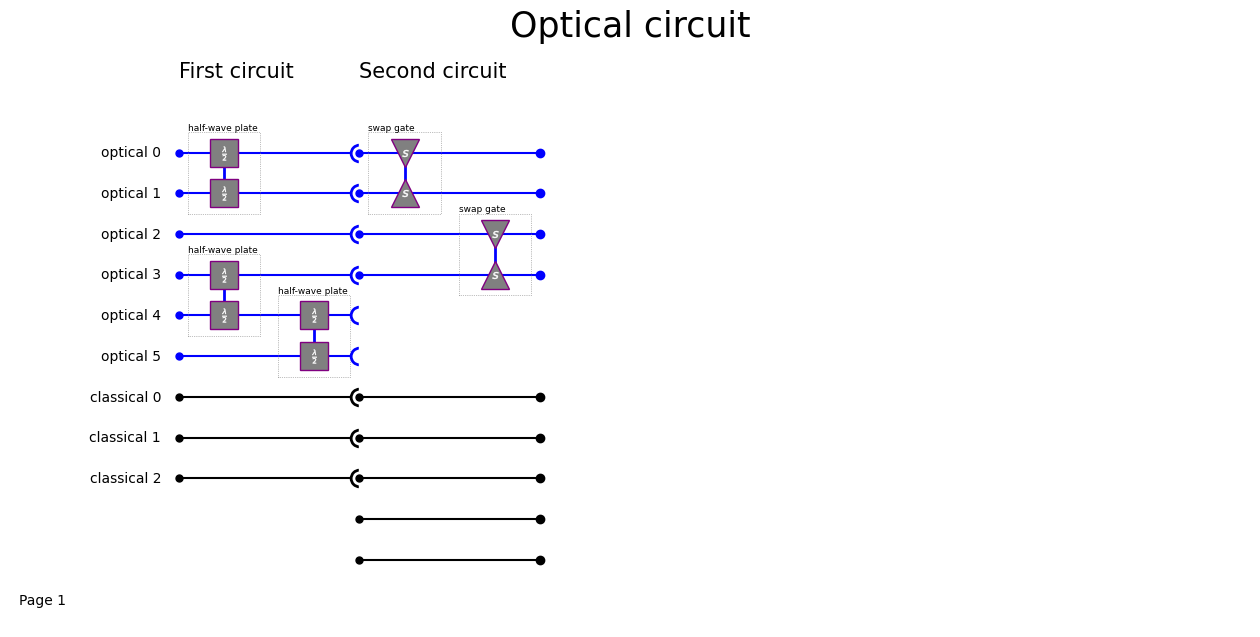

Printing collection of states
Number of states in collection: 3
Identifier: 'identifier_b'
Initial state: '111111'
Cumulative probability: 0.25
Classical values: ['0.00', '0.00', '0.00', '0.00', '0.00']
Optical components: 
	Component: '2021' Amplitude: (-0.71 + 0.00i), Probability: 0.50
	Component: '0221' Amplitude: (0.71 - 0.00i), Probability: 0.50
Identifier: 'identifier_h'
Initial state: '111111'
Cumulative probability: 0.25
Classical values: ['0.00', '0.00', '0.00', '0.00', '0.00']
Optical components: 
	Component: '2021' Amplitude: (0.71 - 0.00i), Probability: 0.50
	Component: '0221' Amplitude: (-0.71 + 0.00i), Probability: 0.50
Identifier: 'identifier_4'
Initial state: '111111'
Cumulative probability: 0.50
Classical values: ['0.00', '0.00', '0.00', '0.00', '0.00']
Optical components: 
	Component: '2001' Amplitude: (0.71 - 0.00i), Probability: 0.50
	Component: '0201' Amplitude: (-0.71 + 0.00i), Probability: 0.50



In [2]:
# define the first circuit
circuit1 = fsc.FockStateCircuit( length_of_fock_state = 3, 
                            no_of_optical_channels = 6,
                            no_of_classical_channels= 3,
                            circuit_name="First circuit"
                            )
circuit1.half_wave_plate_225(channel_horizontal=0,channel_vertical=1)
circuit1.half_wave_plate_225(channel_horizontal=3,channel_vertical=4)
circuit1.half_wave_plate_225(channel_horizontal=4,channel_vertical=5)

# define the second circuit
circuit2 = fsc.FockStateCircuit( length_of_fock_state = 4, 
                            no_of_optical_channels = 4,
                            no_of_classical_channels= 5,
                            circuit_name="Second circuit"
                            )
circuit2.swap(first_channel=0,second_channel=1)
circuit2.swap(first_channel=2,second_channel=3)

# add a bridge node to the first channel, connection it to the second channel
circuit1.bridge(next_fock_state_circuit=circuit2)

# draw the circuit by calling `draw()` on the first circui
circuit1.draw()

# create a collection with one input state for the first circuit
initial_collection_of_states = fsc.CollectionOfStates(fock_state_circuit=circuit1)
initial_collection_of_states.filter_on_initial_state('111111')
result = circuit1.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

print(result)


### Using the class `CompoundFockStateCircuit`
An alternative way to combine circuits together is by using the class `CompoundFockStateCircuit`. This leaves more flexibility to combine circuits in different ways as we do not have to explicitely add a bridge node. So one circuit can be used in different configurations to connect to different other circuits. Under the hood this class still makes use of bridges, but copies of the original circuit are created. So for large circuit it might be more optimal to use bridges directly.

In the below example it is shown how the same functionality as demonstrated above with bridges is executed with a compound circuit. As example of easy re-configuration we also show a compound circuit with the sub-circuits in reversed order.

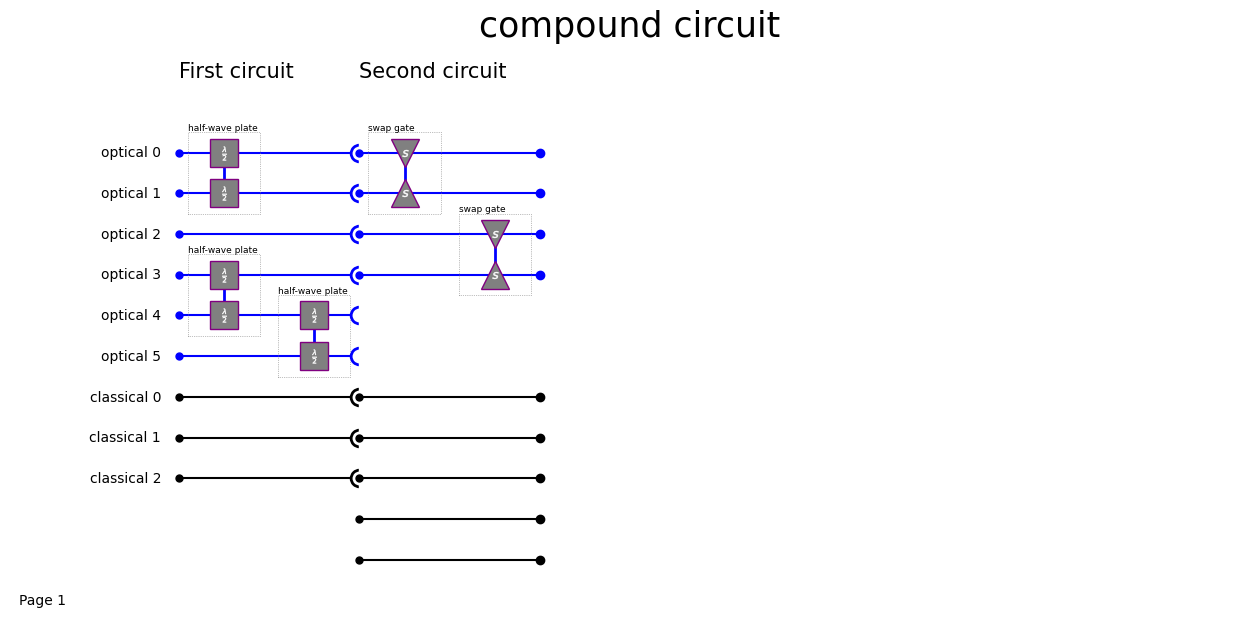

Printing collection of states
Number of states in collection: 3
Identifier: 'identifier_l'
Initial state: '111111'
Cumulative probability: 0.25
Classical values: ['0.00', '0.00', '0.00', '0.00', '0.00']
Optical components: 
	Component: '2021' Amplitude: (-0.71 + 0.00i), Probability: 0.50
	Component: '0221' Amplitude: (0.71 - 0.00i), Probability: 0.50
Identifier: 'identifier_y'
Initial state: '111111'
Cumulative probability: 0.25
Classical values: ['0.00', '0.00', '0.00', '0.00', '0.00']
Optical components: 
	Component: '2021' Amplitude: (0.71 - 0.00i), Probability: 0.50
	Component: '0221' Amplitude: (-0.71 + 0.00i), Probability: 0.50
Identifier: 'identifier_d'
Initial state: '111111'
Cumulative probability: 0.50
Classical values: ['0.00', '0.00', '0.00', '0.00', '0.00']
Optical components: 
	Component: '2001' Amplitude: (0.71 - 0.00i), Probability: 0.50
	Component: '0201' Amplitude: (-0.71 + 0.00i), Probability: 0.50



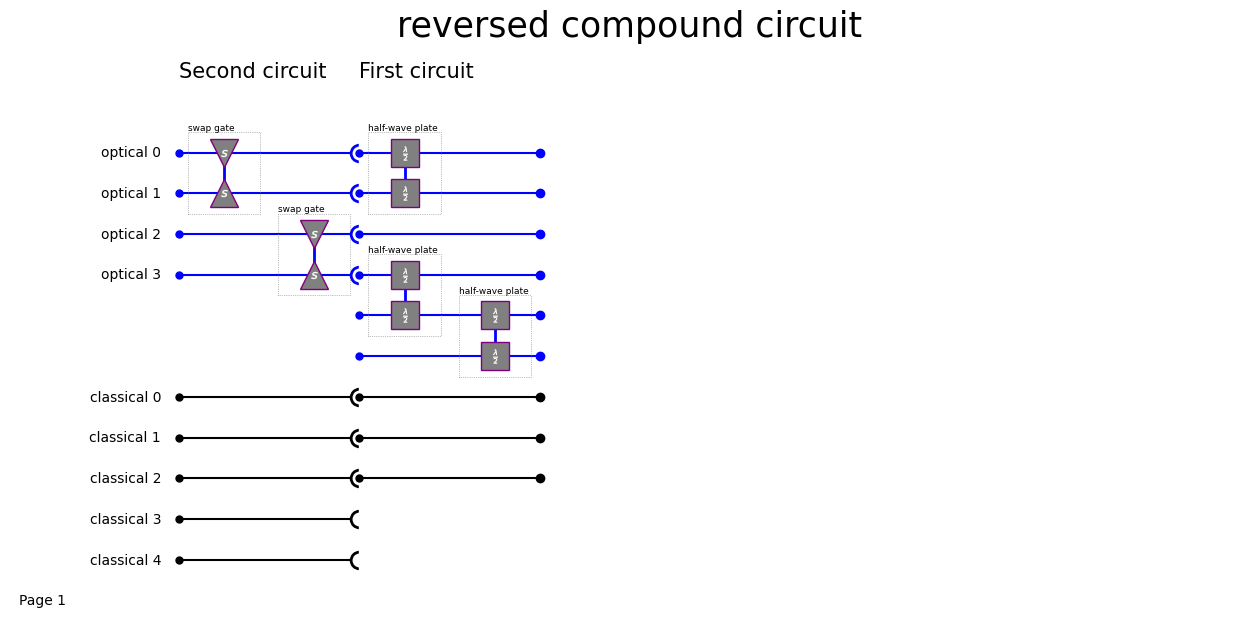

In [3]:
# define the first circuit
circuit1 = fsc.FockStateCircuit( length_of_fock_state = 3, 
                            no_of_optical_channels = 6,
                            no_of_classical_channels= 3,
                            circuit_name="First circuit"
                            )
circuit1.half_wave_plate_225(channel_horizontal=0,channel_vertical=1)
circuit1.half_wave_plate_225(channel_horizontal=3,channel_vertical=4)
circuit1.half_wave_plate_225(channel_horizontal=4,channel_vertical=5)

# define the second circuit
circuit2 = fsc.FockStateCircuit( length_of_fock_state = 4, 
                            no_of_optical_channels = 4,
                            no_of_classical_channels= 5,
                            circuit_name="Second circuit"
                            )
circuit2.swap(first_channel=0,second_channel=1)
circuit2.swap(first_channel=2,second_channel=3)

# create a compound circuit
circuit_list = [circuit1, circuit2]
compound_circuit = fsc.CompoundFockStateCircuit(list_of_circuits=circuit_list, 
                                                compound_circuit_name='compound circuit')

# draw the circuit by calling `draw()` on the compound circuit
compound_circuit.draw()

# create a collection with one input state for the first circuit
initial_collection_of_states = fsc.CollectionOfStates(fock_state_circuit=circuit1)
initial_collection_of_states.filter_on_initial_state('111111')

# run the collection through the compound circuit
result = compound_circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

print(result)

# create a compound circuit with sub-circuits in reversed order
reversed_circuit_list = [circuit2, circuit1]
reversed_compound_circuit = fsc.CompoundFockStateCircuit(list_of_circuits=reversed_circuit_list, 
                                                compound_circuit_name='reversed compound circuit')
reversed_compound_circuit.draw()

## Example of combining circuits using `bridges`: Quantum Teleportation
Below we use `bridges` to combined sub-circuits into a larger circuits. In this example the purpose of the bridges is to clearly separate functionality to make it more easy to understand how the circuit works. As we use the same settings for each sub-circuit (same number of channels and `length_of_fock_state`) there is no computatitional advantage.

The example below performs quantum teleportation. This tutorial is aimed at demonstrating the use of `bridge`-nodes so we do not go into depth for teleporation. Check https://armchairquantumphysicist.com/2023/08/28/quantum-teleportation-with-fockstatecircuit/  if you want to know more about quantum teleportation.

### First we create the circuit including the bridge nodes

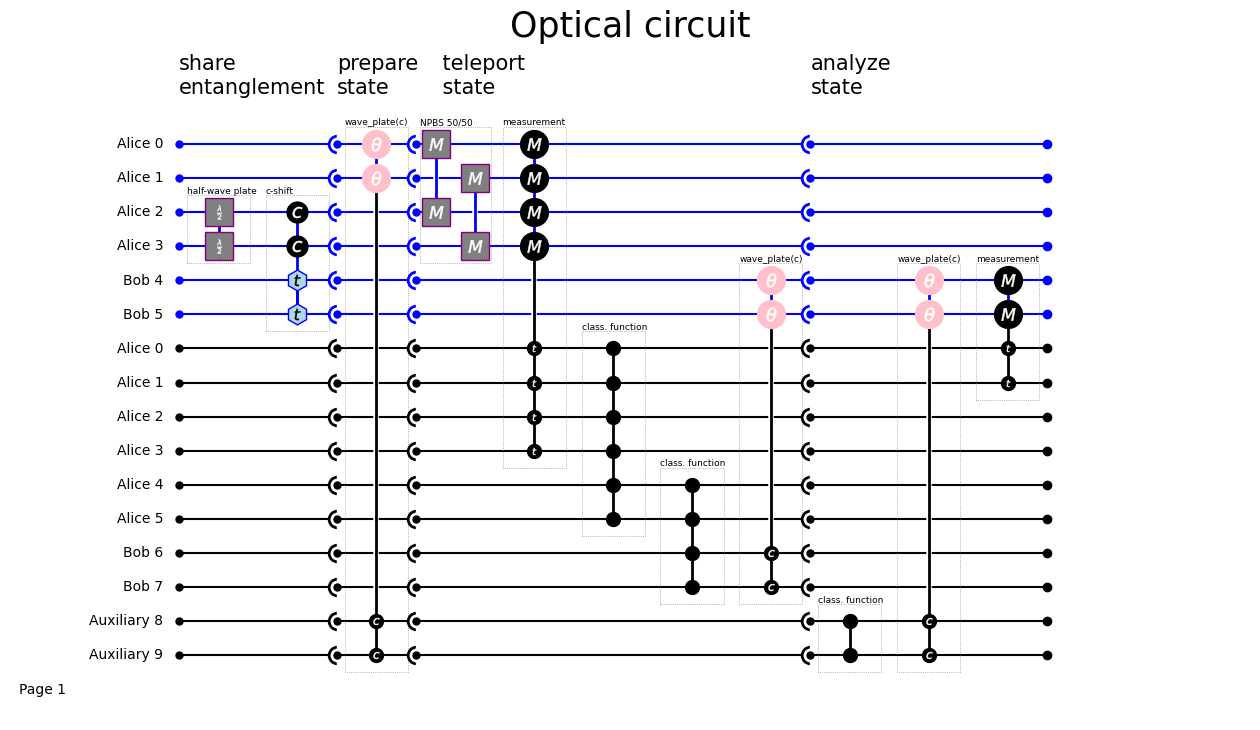

In [4]:
# create the shared entangled state in channels 2,3,4 and 5
box = fsc.FockStateCircuit( length_of_fock_state = 3, 
                            no_of_optical_channels = 6,
                            no_of_classical_channels= 10,
                            circuit_name="share\nentanglement"
                            )
box.half_wave_plate_225(channel_horizontal=3,channel_vertical=2)
box.c_shift(control_channels=[2,3], target_channels=[5,4])
preparation = fsc.FockStateCircuit( length_of_fock_state = 3, 
                                    no_of_optical_channels = 6,
                                    no_of_classical_channels=10,
                                    circuit_name="prepare\nstate"
                                    )
box.bridge(preparation)

# prepare the source photon (channels 0-1 based on values in auxiliary channels 8 and 9
preparation.wave_plate_classical_control(   optical_channel_horizontal = 0,
                                            optical_channel_vertical = 1,
                                            classical_channel_for_orientation = 8,
                                            classical_channel_for_phase_shift = 9
                                            )

# ========= Starting the teleportation =================
teleportation = fsc.FockStateCircuit(   length_of_fock_state = 3, 
                                                no_of_optical_channels = 6,
                                                no_of_classical_channels=10,
                                                circuit_name="    teleport\n    state"
                                                )
preparation.bridge(teleportation)
# Bell state measurement by sender on source photon and first photon of shared pair
# write the result to classical channels 0-3
teleportation.non_polarizing_50_50_beamsplitter(input_channels_a = (0,1), 
                                                input_channels_b = (2,3)
                                                )
teleportation.measure_optical_to_classical( optical_channels_to_be_measured=[0,1,2,3],
                                            classical_channels_to_be_written=[0,1,2,3]
                                            )

# define communication in channels 6 and 7 to receiver based on outcome of Bell State measurement
def define_communication_bits(input_list, new_values = [], affected_channels = []):
    # if a Bell state is detected the two bits are 0-0 or 0-1
    lookup_table = {(1,1,0,0) : (0,0),
                    (0,0,1,1) : (0,0),
                    (0,1,1,0) : (0,1),
                    (1,0,0,1) : (0,1)
                    }
    
    # default value for the two bits is 1-1
    communication = lookup_table.get(tuple(input_list[0:4]),(1,1))
    
    input_list[4], input_list[5] = communication[0], communication[1]
    return input_list

teleportation.classical_channel_function(define_communication_bits, affected_channels=[0,1,2,3,4,5])

# at receiver side, read the communication in channels 6 and 7 and 
# decide how to oriented the wave plates for retrieving the desired quantum state
def determine_wave_plate_settings(input_list, new_values = [], affected_channels = []):
    # if the communication is 0-0 apply a phase shift. if it is 0-0 do nothing.
    lookup_table = {(0,0) : (0,math.pi), (0,1) : (0,0)}
    bell_result = tuple(input_list[4:6])
    communication = lookup_table.get(bell_result,(0,0))
    input_list[6], input_list[7] = communication[0], communication[1]
    return input_list

teleportation.classical_channel_function(determine_wave_plate_settings, affected_channels=[4,5,6,7])

teleportation.wave_plate_classical_control( optical_channel_horizontal = 4,
                                            optical_channel_vertical = 5,
                                            classical_channel_for_orientation = 6,
                                            classical_channel_for_phase_shift = 7
                                            )

# ========= Teleportation complete ================= 
analysis = fsc.FockStateCircuit(   length_of_fock_state = 3, 
                                    no_of_optical_channels = 6,
                                    no_of_classical_channels=10,
                                    circuit_name="analyze\nstate"
                                    )
teleportation.bridge(analysis)

# reverse the operation on the source photon, but now for the target photon
def reverse_angles(input_list, new_values = [], affected_channels = []):
    input_list[8], input_list[9] = input_list[8], -1*input_list[9]
    return input_list
analysis.classical_channel_function(reverse_angles, affected_channels=[8,9])  

analysis.wave_plate_classical_control( optical_channel_horizontal = 4,
                                        optical_channel_vertical = 5,
                                        classical_channel_for_orientation = 8,
                                        classical_channel_for_phase_shift = 9)

# perform a measurement on the target photon in optical channel 6 and 7 
analysis.measure_optical_to_classical( optical_channels_to_be_measured=[4,5],
                                        classical_channels_to_be_written=[0,1])


optical_channels = ["Alice 0","Alice 1","Alice 2", "Alice 3", "Bob 4", "Bob 5"]
classical_channels = ["Alice 0","Alice 1","Alice 2", "Alice 3","Alice 4", "Alice 5", "Bob 6", "Bob 7", "Auxiliary 8", "Auxiliary 9"]
settings = {'channel_labels_optical': optical_channels , 'channel_labels_classical':classical_channels, 'number_of_nodes_on_a_line' : 11}
box.draw(settings_for_drawing_circuit=settings)


### Next we create a collection of states to be used at the input

In [5]:
# a list of random settings for the source photon, to show teleportation works for any state
list_of_source_photons = [(math.pi,math.pi), 
                          (math.pi/2,-1*math.pi/3), 
                          (-1*math.pi/4,math.pi/4), 
                          ((3/7)*math.pi,(1/7)*math.pi), 
                          (0,0)
                          ]

initial_collection_of_states = fsc.CollectionOfStates(fock_state_circuit=box)
state_default = initial_collection_of_states.get_state(initial_state='000000').copy()
initial_collection_of_states.clear()

# create collection of states with one state per setting for the source photon
for index, setting in enumerate(list_of_source_photons):      
    state = state_default.copy()
    state.initial_state = 'state_0' + str(index)
    state.optical_components = [('101000', 1)]

    state.classical_channel_values = [0]*8 + [setting[0]] + [setting[1]]
    initial_collection_of_states.add_state(state)

### Finally we run the combined circuit

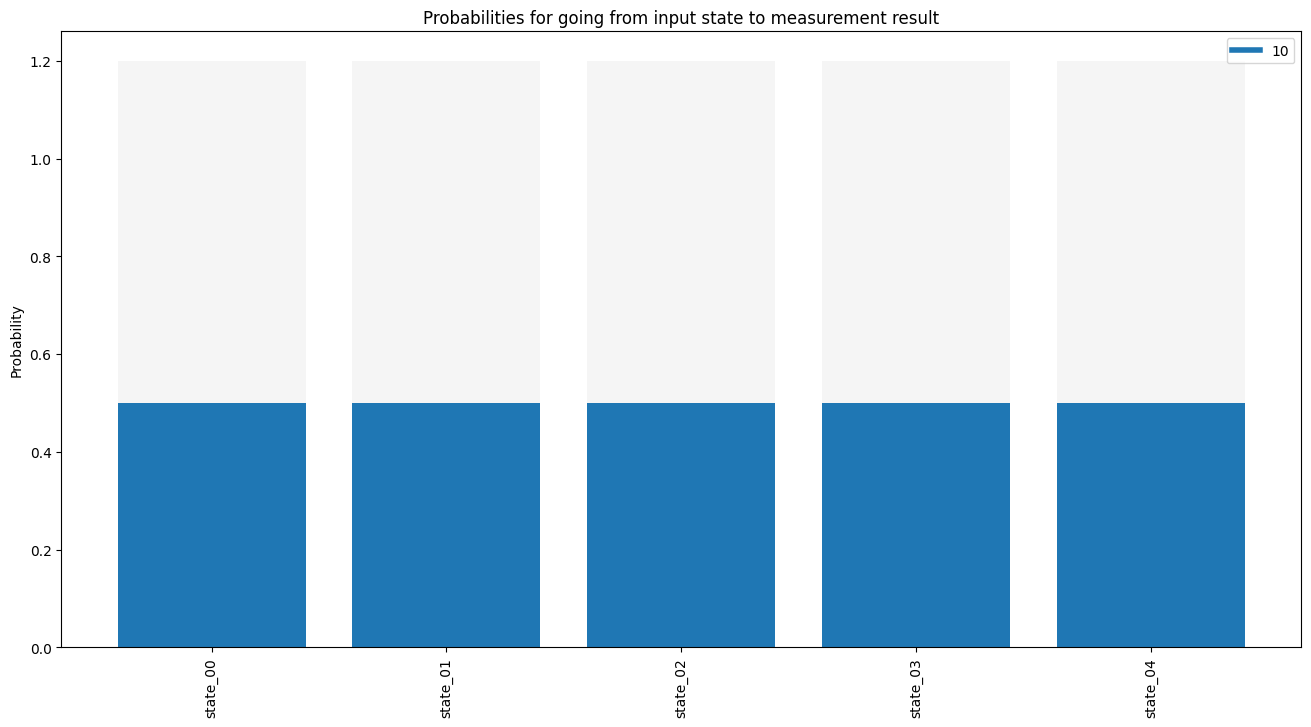

In [6]:
result = box.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

# filter on the outcomes where classical channel 6 is '0'. Only in these case a Bell state has been detected
result.filter_on_classical_channel(classical_channel_numbers=[4], values_to_filter=[0])

result.plot(classical_channels=[0,1])


## Example of combining circuits using `CompoundFockStateCircuit`: GHZ state creation
Below we show an example of using the class `CompoundFockStateCircuit`. The advantages of using a compound circuit is that we can be efficient with calculation time (the `main_circuit` has 8 optical channels with up to 4 photons, so the fact that we can use a smaller circuit for state preparation helps speed up). Furthermore in this case we want to use different detector setups (with different detector orientations). In the compound circuit we can configure circuits with a different detection circuit without having to redefine the complete circuit. This re-use helps in keeping the overview. Finally, just as in the teleportation example above, understanding of the circuit is enhanced by clearly splitting functionality over the sub-circuits.

The example below creates a 'GHZ state'. This tutorial is aimed at demonstrating the use of the `CompoundFockStateCircuit`-class so we do not go into depth for GHZ state creation. Check https://armchairquantumphysicist.com/2023/08/17/simulation-of-greenbergen-horne-zeilinger-entanglement-creation/  if you want to know more about GHZ state creation.

### First we create the sub-circuits we want to combine.
We have a 'preparation' circuit  to create the input state, a 'main circuit' to execute the intended function and then 4 different detection circuits to check the outcome. We want to run 4 different configurations of these sub-circuits.

In [7]:
preparation = fsc.FockStateCircuit( length_of_fock_state = 3, 
                                no_of_optical_channels = 4,
                                no_of_classical_channels=1,
                                circuit_name = 'Preparation'
                                )

main_circuit = fsc.FockStateCircuit( length_of_fock_state = 3, 
                                no_of_optical_channels = 8,
                                no_of_classical_channels=4,
                                circuit_name = 'GHZ creation'
                                )

detection_1 = fsc.FockStateCircuit( length_of_fock_state = 3, 
                                no_of_optical_channels = 8,
                                no_of_classical_channels=4,
                                circuit_name = 'D1@+,D2@-,D3@-'
                                )

detection_2 = fsc.FockStateCircuit( length_of_fock_state = 3, 
                                no_of_optical_channels = 8,
                                no_of_classical_channels=4,
                                circuit_name = 'D1@+,D2@-,D3@+'
                                )

detection_3 = fsc.FockStateCircuit( length_of_fock_state = 3, 
                                no_of_optical_channels = 8,
                                no_of_classical_channels=4,
                                circuit_name = 'D1@0,D2@-,D3@+'
                                )
detection_4 = fsc.FockStateCircuit( length_of_fock_state = 3, 
                                no_of_optical_channels = 8,
                                no_of_classical_channels=4,
                                circuit_name = 'D1@0,D2@-,D3@+'
                                )
# Start in basis $|ah>|av>|bh>|bv>|BSh>|BSv>|PBSh>|PBSv>$
preparation.shift(target_channels=[0,1], shift_per_channel=[1,1])
preparation.c_shift(control_channels=[0,1],target_channels=[2,3])
preparation.time_delay_classical_control(affected_channels=[0,1], classical_channel_for_delay=0, bandwidth=1)

# The polarizing beamsplitter works between channels 0,1 and 6,7 
# (so between channel 'a' and the PBS vacuum input)
main_circuit.polarizing_beamsplitter(input_channels_a=(0,1),input_channels_b=(6,7))

# We add the half wave plate behind the polarizing beamsplitter
# This is for channels 6 and 7 representing horizontal and vertical polarization for this output of the PBS
main_circuit.half_wave_plate_225(channel_horizontal=7,channel_vertical=6)

# The non-polarizing beamsplitter in front of detector 3 works between channels 2,3 and 4,5 
# (so between channel 'b' and the BS vacuum input)

main_circuit.non_polarizing_50_50_beamsplitter(input_channels_a=(2,3),input_channels_b=(4,5))
# We add the second non-polarizing beamsplitter mixing the output of the half wave plate and the first non-polarizing beamsplitter
main_circuit.polarizing_beamsplitter(input_channels_a=(6,7),input_channels_b=(4,5))

# bring the output to basis ThTbD1hD1vD2hD2vD3hD3v
main_circuit.swap(4,2) 
main_circuit.swap(5,3)
main_circuit.swap(4,6)
main_circuit.swap(5,7)

# We add a half wave plate in front of detector D1 at +22.5 degree 
detection_1.half_wave_plate(channel_horizontal=2,channel_vertical=3, angle = math.pi/8)
detection_2.half_wave_plate(channel_horizontal=2,channel_vertical=3, angle = math.pi/8)
detection_3.half_wave_plate(channel_horizontal=2,channel_vertical=3, angle = 0)
detection_4.half_wave_plate(channel_horizontal=2,channel_vertical=3, angle = 0)

# We add a half wave plate in front of detector D2 at -22.5 degree 
detection_1.half_wave_plate(channel_horizontal=4, channel_vertical=5, angle = -1*math.pi/8)
detection_2.half_wave_plate(channel_horizontal=4, channel_vertical=5, angle = -1*math.pi/8)
detection_3.half_wave_plate(channel_horizontal=4, channel_vertical=5, angle = -1*math.pi/8)
detection_4.half_wave_plate(channel_horizontal=4, channel_vertical=5, angle = -1*math.pi/8)

# We add a half wave plate in front of detector D3 at +22.5 degree or -22.5 degree
# for detection_1 with D3 at +45 degree we see 6% occurence of 4 fold correlation
# for two photons channel a this should lead to a photon on Th and D2h, for two photons in b this should lead to a photon on D1h and D3h
# for detection_2 with D3 at -45 degree we see no occurence of 4 fold correlation
detection_1.half_wave_plate(channel_horizontal=6, channel_vertical=7, angle = +1*math.pi/8)
detection_2.half_wave_plate(channel_horizontal=6, channel_vertical=7, angle = -1*math.pi/8)
detection_3.half_wave_plate(channel_horizontal=6, channel_vertical=7, angle = +1*math.pi/8)
detection_4.half_wave_plate(channel_horizontal=6, channel_vertical=7, angle = -1*math.pi/8)

# We map the optical channels on the classical channels such that the result in the classical channels in the order Th,Tv,D1h,D1,D2,D2,D3h,D3v
detection_1.measure_optical_to_classical(optical_channels_to_be_measured=[0,2,4,6],classical_channels_to_be_written=[0,1,2,3])
detection_2.measure_optical_to_classical(optical_channels_to_be_measured=[0,2,4,6],classical_channels_to_be_written=[0,1,2,3])
detection_3.measure_optical_to_classical(optical_channels_to_be_measured=[0,2,4,6],classical_channels_to_be_written=[0,1,2,3])
detection_4.measure_optical_to_classical(optical_channels_to_be_measured=[0,2,4,6],classical_channels_to_be_written=[0,1,2,3])


### Next we create the input state.
We have the vacuum state as input state with different time delays between the channels defined in the classical channel.

In [8]:
initial_collection_of_states_curve = fsc.CollectionOfStates(fock_state_circuit=preparation, input_collection_as_a_dict=dict([]))

# the list delays contains the different values of time delay between the channels
delays = [n/4.0 for n in range(-20,21)]

for n in delays:
    state1 = fsc.State(collection_of_states=initial_collection_of_states_curve)
    state1.initial_state = 'delay' + str(n)
    state1.optical_components = [('0000', 1)]
    state1.classical_channel_values = [n]
    initial_collection_of_states_curve.add_state(state1)

### Run the circuits
Next we run the input state through the 4 different circuits. For any case the `preparation` and the `main circuit` are the same, and we add one of the 4 `detection`-circuits. We iterate through the 4 configurations, creating a graph of the 4-fold coincidence rate (so the probability to detect 4 photons, each in one detector)

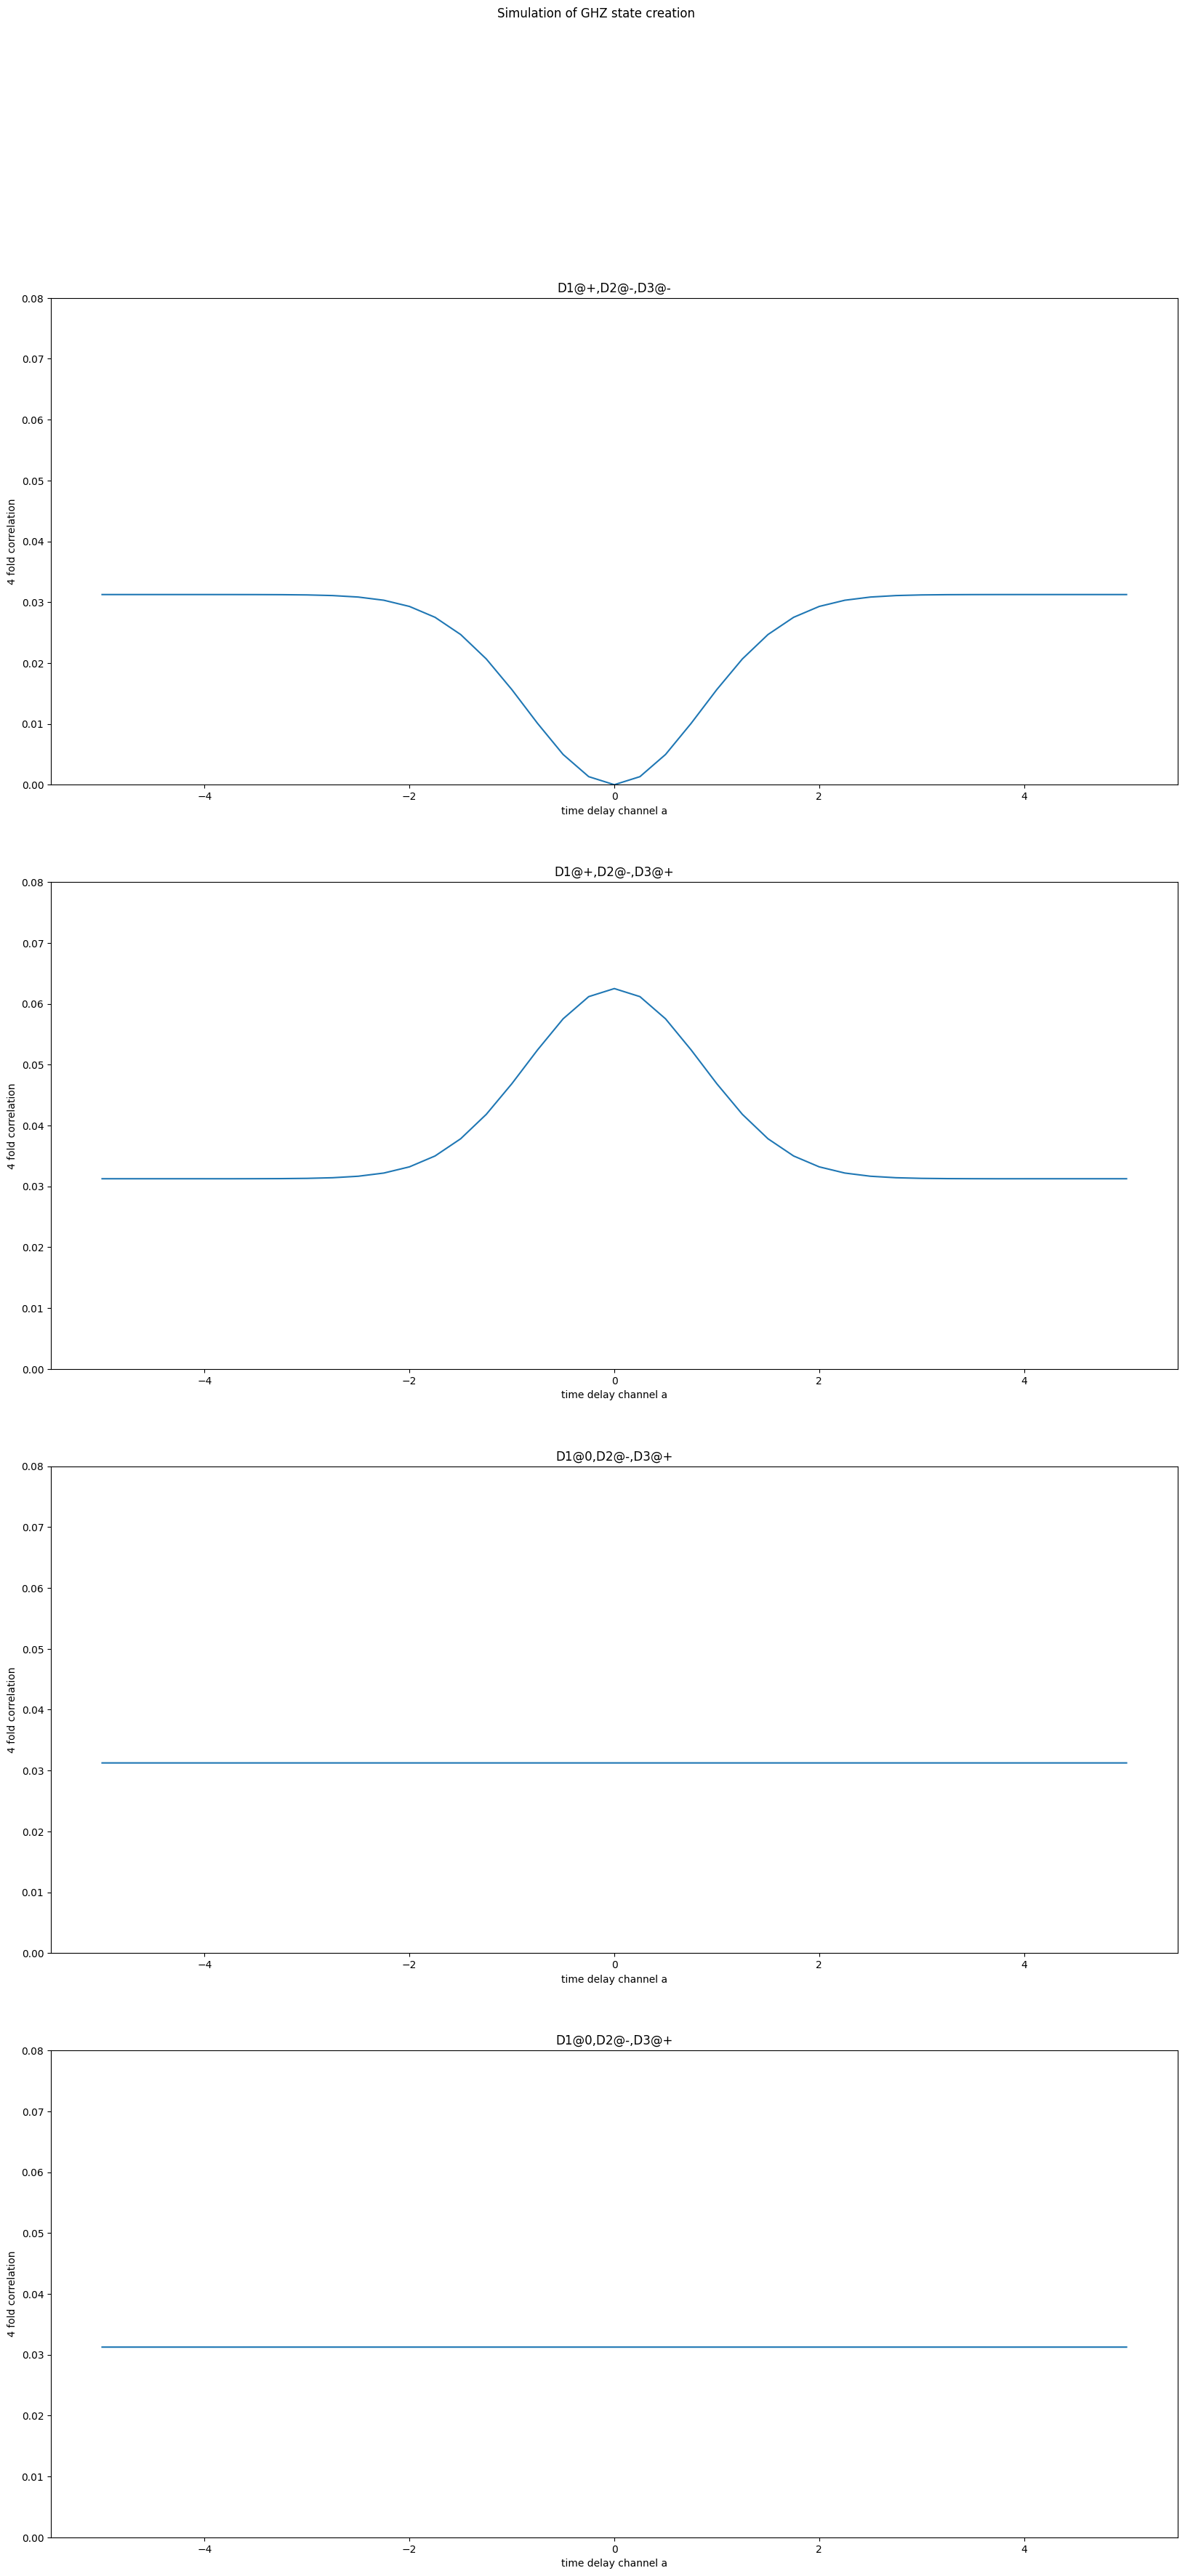

In [9]:

fig, axs = plt.subplots(4,1, figsize = (20,40))
fig.suptitle('Simulation of GHZ state creation')

list_of_circuit_lists= [
    [preparation, main_circuit, detection_1],
    [preparation, main_circuit, detection_2],
    [preparation, main_circuit, detection_3],
    [preparation, main_circuit, detection_4]
    ]

for index,circuit_list in enumerate(list_of_circuit_lists)  :
    compound_circuit = fsc.CompoundFockStateCircuit(circuit_list)
    result = compound_circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states_curve)
    histo = result.plot(histo_output_instead_of_plot=True)
    
    detection_probabilities = []
    for key,value in histo.items():
        for datapoint in value:
            if datapoint['output_state'] == '1111':
                detection_probabilities.append(datapoint['probability'])

    label = compound_circuit.list_of_circuits[2]._circuit_name
    axs[index].set_title(label)
    axs[index].set_xlabel('time delay channel a')
    axs[index].set_ylabel('4 fold correlation')
    axs[index].set_ylim(0,0.08)
    axs[index].plot(delays,detection_probabilities)


In [10]:
fsc.about()


FockStateCircuit: Quantum Optics with Fock States for Python
Copyright (c) 2023 and later.
Rob Hendriks

FockStateCircuit:            1.0.2
CollectionOfStates:          1.0.0
State:                       1.0.1
ColumnOfStates:              1.0.0
InterferenceGroup:           1.0.0
CollectionOfStateColumns:    1.0.0
OpticalNodes:                1.0.0
BridgeNodes:                 1.0.0
CustomNodes:                 1.0.0
ControlledNodes:             1.0.0
MeasurementNodes:            1.0.0
ClassicalNodes:              1.0.0
SpectralNodes:               1.0.0
temporal_functions:          1.0.0
Numpy Version:               1.26.4
Matplotlib version:          3.8.4


# Change history
* Inital version November 2023
* Update April 2024 to adjust to FockStateCircuit vs 1.0.0
    -   Remove `import collection of states as cos`
    -   Replace `cos.CollectionOfStates` and `cos.State` by `fsc.CollectionOfStates` and `fsc.State`
